<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sentiment-changes-over-time" data-toc-modified-id="Sentiment-changes-over-time-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sentiment changes over time</a></span></li><li><span><a href="#Senders'-Sentiment" data-toc-modified-id="Senders'-Sentiment-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Senders' Sentiment</a></span></li></ul></div>

In [135]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
from datetime import datetime

from tqdm import tqdm_notebook
import re
from function_library import *
from function_library2 import *
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

In [2]:
df = pd.read_csv('output6_triplets_names.csv',index_col = 0)
df['Sent'] = pd.to_datetime(df['Sent'])
df


,From,Sent,To,CC,Subject,Attachments,Importance,Body,textblob_sentiment,nltk_sentiment
0,"('cindy', 'dick', 'cynthia.dick@talgov.com')",2011-08-18 12:12:00,"[('fire', 'department', 'fire_department')]",[],[],[],[],['I recently came across this quote and reflec...,"[0.275, 0.39583333333333337]","[0.0, 0.149, 0.701, 0.149]"
1,"('mark', 'decarlo', 'mark.decarlo@talgov.com')",2011-08-20 03:44:00,"[('fire', 'department', 'fire_department')]",[],[],[],[],[''],"[0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"
2,"('deborah', 'heiter', 'deborah.heiter@talgov.c...",2012-01-20 16:41:00,"[('bill', 'behenna', 'bill_behenna'), ('cathy'...",[],[],[],[],"['', 'Deborah L. Heiter', 'Administrative Spec...","[0.07253787878787879, 0.3424242424242424]","[0.9318, 0.0, 0.93, 0.07]"
3,"('beth', 'kirkland', 'bkirkland@taledc.com')",2012-01-23 09:32:00,"[('f496', 'l496', 'llaubscher@eflorida.com')]","[('f18020', 'l18020', 'brook.pace@deo.myflorid...",[],[],[],"['Louis,', 'Thank you for meeting with us in F...","[0.012500000000000011, 0.36944444444444446]","[0.9599, 0.021, 0.847, 0.132]"
4,"('vida', 'addison', 'vida.addison@talgov.com')",2012-02-07 15:19:00,"[(""gary yordon' no, they have not told me anyt...",[],[],[],[],"['Hello, Do you have a 4meline for when a deci...","[0.021875000000000006, 0.403125]","[0.8708, 0.0, 0.879, 0.121]"
5,"('gary', 'yordon', 'gary@govinc.net')",2012-02-08 15:15:00,"[('john', 'cox', 'john.cox@talgov.com')]",[],[],[],[],"['Hello John, I know there is a commiYee proc...","[0.13333333333333333, 0.16666666666666666]","[0.6486, 0.0, 0.928, 0.072]"
6,"('john', 'cox', 'john.cox@talgov.com')",2012-02-09 11:25:00,"[('gary', 'yordon', 'gary@govinc.net')]",[],[],[],[],"['', '', 'I am concerned with the capacity to ...","[0.0, 0.0]","[0.1901, 0.0, 0.941, 0.059]"
7,"('gary', 'yordon', 'gary@govinc.net')",2012-02-09 11:40:00,"[('john', 'cox', 'john.cox@talgov.com')]",[],[],[],[],"['', '', 'ThanksI really even felt awkward sen...","[0.030555555555555558, 0.4861111111111111]","[0.6196, 0.022, 0.937, 0.04]"
8,"('vida', 'addison', 'vida.addison@talgov.com')",2012-02-21 14:18:00,"[('f497', 'l497', 'hayley@thinkcreative.com'),...",[],[],[],[],['I am resending the informa4on. Please let m...,"[0.0, 0.0]","[0.3182, 0.0, 0.933, 0.067]"
9,"('gary', 'yordon', 'gary@govinc.net')",2012-02-21 14:55:00,"[('rick', 'oppenheim', 'roppenheim@rboa.com')]",[],[],[],[],"['', '', 'If you look you will see the problem...","[0.0, 0.0]","[0.0, 0.0, 1.0, 0.0]"


# Sentiment changes over time

textblob

Parser that uses the implementation in Tom de Smedt’s pattern library. http://www.clips.ua.ac.be/pages/pattern-en#parser

In [64]:
textblob_sentiment = df['textblob_sentiment'].values.tolist()
for i in range(len(textblob_sentiment)):
    textblob_sentiment[i] = eval(textblob_sentiment[i])
textblob_sentiment = np.array(textblob_sentiment)

In [65]:
textblob_sentiment.shape

(21814, 2)

nltk

Using vader lexicons: https://github.com/cjhutto/vaderSentiment/tree/master/vaderSentiment

In [66]:
nltk_sentiment = df['nltk_sentiment'].values.tolist()
for i in range(len(nltk_sentiment)):
    nltk_sentiment[i] = eval(nltk_sentiment[i])
nltk_sentiment = np.array(nltk_sentiment)

In [17]:
year_list = df['Sent'].dt.year
month_list = df['Sent'].dt.month

In [79]:
textblob_sentiment_by_month=np.zeros((6,12,2))
textblob_sentiment_by_month_avg=np.zeros((6,12,2))

nltk_sentiment_by_month=np.zeros((6,12,4))
nltk_sentiment_by_month_avg=np.zeros((6,12,4))

email_counts_by_month=np.zeros((6,12))

for i in range(len(month_list)):
    year_idx = year_list[i]-2012
    month_idx = month_list[i]-1
    if textblob_sentiment[i,0] != 0 or textblob_sentiment[i,1] != 0:
        textblob_sentiment_by_month[year_idx, month_idx, :] += textblob_sentiment[i,:]
    if nltk_sentiment[i,1] != 0 or nltk_sentiment[i,2] != 0 or nltk_sentiment[i,3] != 0:
        nltk_sentiment_by_month[year_idx, month_idx, :] += nltk_sentiment[i,:]    
        email_counts_by_month[year_idx, month_idx] += 1
for i in range(6):
    for j in range(12):
        if email_counts_by_month[i,j] != 0:
            textblob_sentiment_by_month_avg[i,j,:] = textblob_sentiment_by_month[i,j,:] / email_counts_by_month[i,j]
            nltk_sentiment_by_month_avg[i,j,:] = nltk_sentiment_by_month[i,j,:] / email_counts_by_month[i,j]        

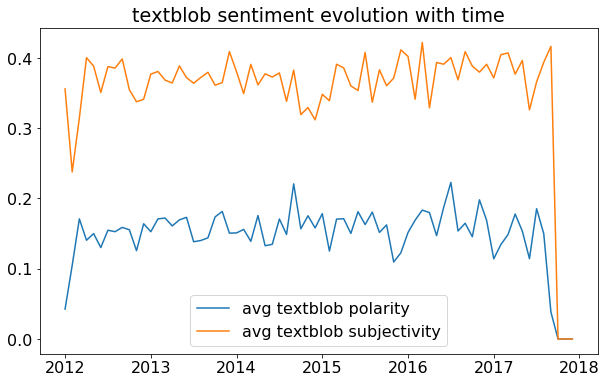

In [161]:
textblob_label = ['polarity', 'subjectivity']
fig, ax = plt.subplots(figsize = (10,6))
for i in range(2):
    vec = textblob_sentiment_by_month_avg[:,:,i].reshape(-1)
    plt.plot(vec, label = 'avg textblob '+ textblob_label[i])


ax.set_xticks(np.linspace(0,12*6,7))
ax.set_xticklabels(['2012','2013','2014','2015','2016','2017','2018'])
plt.title('textblob sentiment evolution with time')
plt.legend()
plt.show()

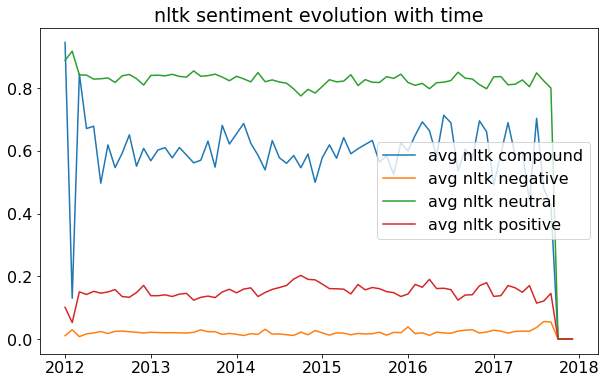

In [162]:
nltk_label = ['compound', 'negative', 'neutral', 'positive']
fig, ax = plt.subplots(figsize = (10,6))
for i in range(4):
    vec = nltk_sentiment_by_month_avg[:,:,i].reshape(-1)
    plt.plot(vec, label = 'avg nltk '+ nltk_label[i])
plt.title('nltk sentiment evolution with time')
ax.set_xticks(np.linspace(0,12*6,7))
ax.set_xticklabels(['2012','2013','2014','2015','2016','2017','2018'])
plt.legend()
plt.show()

# Senders' Sentiment

In [131]:
# adam corey

In [148]:
from_list = df['From'].values.tolist()
adam_corey_email_idxs = []
unique_email_address = []
adam_corey_email = []
for i in range(len(from_list)):
    from_list[i] = eval(from_list[i])
    if from_list[i][0] == 'adam' and from_list[i][1] == 'corey':
        email = from_list[i][2]
        adam_corey_email_idxs.append(i)
        if email in unique_email_address:
            adam_corey_email.append(unique_email_address.index(email))
        else:
            unique_email_address.append(email)
            adam_corey_email.append(unique_email_address.index(email))
            

In [149]:
unique_email_address
# 1 -> 0
# 5 -> 4

['acorey@gunster.com',
 'mailtozacorey@gunster.com',
 'adam@101tallahassee.com',
 'adambcorey@gmail.com',
 'acorey@101tally.com',
 'mailtozacorey@101tally.com',
 'adam@unconventionalstrategies.com',
 'adam@edisontally.com']

In [150]:
adam_corey_textblob_sentiment = textblob_sentiment[adam_corey_email_idxs,:]

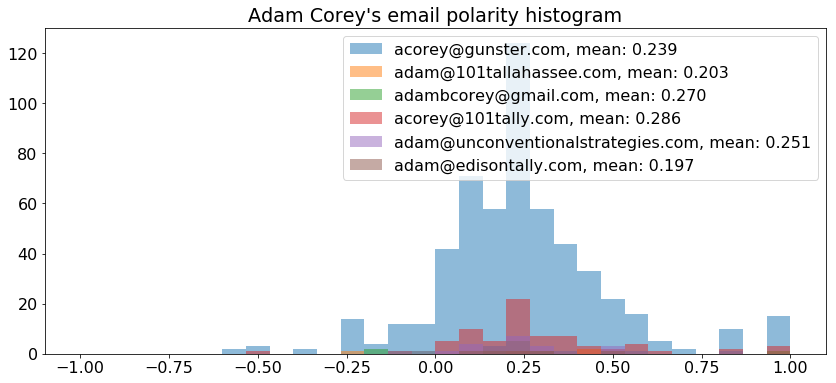

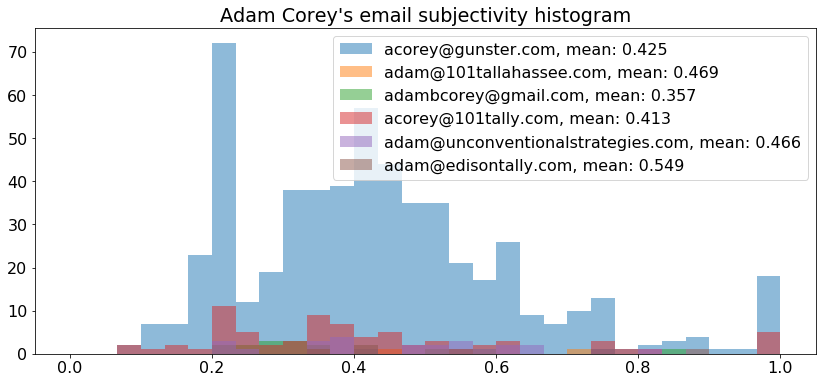

In [151]:
adam_corey_email = np.array(adam_corey_email)
adam_corey_email[adam_corey_email == 1] = 0
adam_corey_email[adam_corey_email == 5] = 4

plt.figure(figsize=(14,6))
plt.title("Adam Corey's email polarity histogram")
for i in [0,2,3,4,6,7]:
    email_address = unique_email_address[i]
    vec = adam_corey_textblob_sentiment[adam_corey_email == i,0]
    plt.hist(vec[vec!=0], range=[-1,1], bins=30, alpha = 0.5, label = email_address+ ', mean: '+ str(np.mean(vec[vec!=0]))[:5])
plt.legend()
plt.show()

plt.figure(figsize=(14,6))
plt.title("Adam Corey's email subjectivity histogram")
for i in [0,2,3,4,6,7]:
    email_address = unique_email_address[i]
    vec = adam_corey_textblob_sentiment[adam_corey_email == i,1]
    plt.hist(vec[vec!=0], range=[0,1], bins=30, alpha = 0.5, label = email_address+ ', mean: '+ str(np.mean(vec[vec!=0]))[:5])
plt.legend()
plt.show()

In [152]:
# scott maddox

In [159]:
scott_maddox_email_idxs = []
unique_email_address = []
scott_maddox_email = []
for i in range(len(from_list)):
    if from_list[i][0] == 'scott' and from_list[i][1] == 'maddox':
        email = from_list[i][2]
        scott_maddox_email_idxs.append(i)
        if email in unique_email_address:
            scott_maddox_email.append(unique_email_address.index(email))
        else:
            unique_email_address.append(email)
            scott_maddox_email.append(unique_email_address.index(email))
            

In [160]:
unique_email_address

['scott.maddox@talgov.com',
 'scott@scottmaddox.com',
 'scottcharlesmaddox@gmail.com',
 'shamaddox@embarqmail.com']

In [155]:
scott_maddox_textblob_sentiment = textblob_sentiment[scott_maddox_email_idxs,:]

/Users/joey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/joey/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


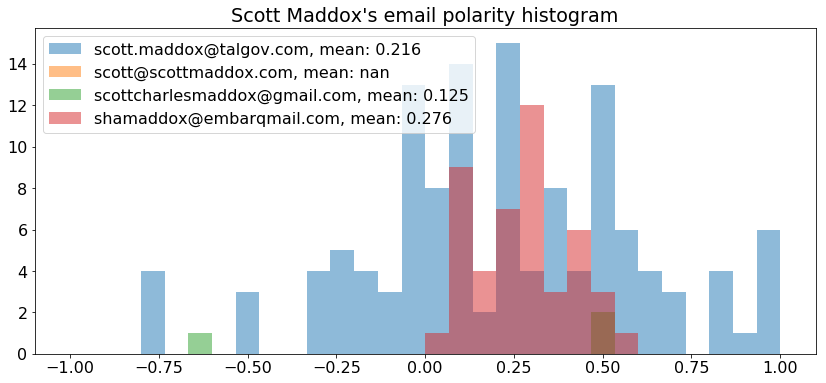

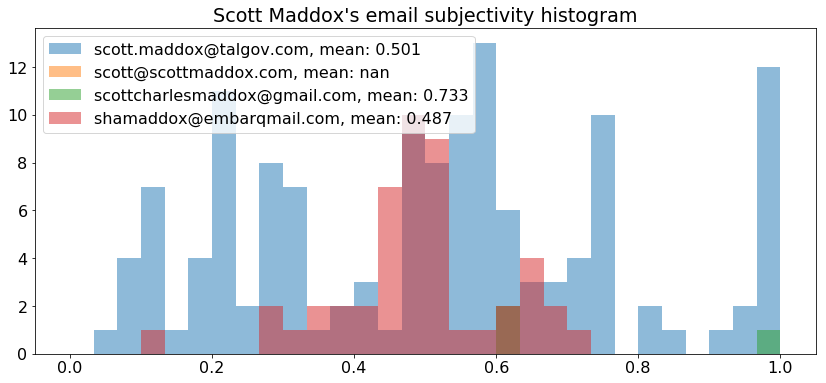

In [156]:
scott_maddox_email = np.array(scott_maddox_email)
scott_maddox_email[scott_maddox_email == 1] = 0
scott_maddox_email[scott_maddox_email == 5] = 4

plt.figure(figsize=(14,6))
plt.title("Scott Maddox's email polarity histogram")
for i in range(len(unique_email_address)):
    email_address = unique_email_address[i]
    vec = scott_maddox_textblob_sentiment[scott_maddox_email == i,0]
    plt.hist(vec[vec!=0], range=[-1,1], bins=30, alpha = 0.5, label = email_address + ', mean: '+ str(np.mean(vec[vec!=0]))[:5])
plt.legend()
plt.show()

plt.figure(figsize=(14,6))
plt.title("Scott Maddox's email subjectivity histogram")
for i in range(len(unique_email_address)):
    email_address = unique_email_address[i]
    vec = scott_maddox_textblob_sentiment[scott_maddox_email == i,1]
    plt.hist(vec[vec!=0], range=[0,1], bins=30, alpha = 0.5, label = email_address + ', mean: '+ str(np.mean(vec[vec!=0]))[:5])
plt.legend()
plt.show()

In [ ]:
scott_maddox_email_idxs = []
unique_email_address = []
scott_maddox_email = []
for i in range(len(from_list)):
    if from_list[i][0] == 'peige' and from_list[i][1] == 'maddox':
        email = from_list[i][2]
        scott_maddox_email_idxs.append(i)
        if email in unique_email_address:
            scott_maddox_email.append(unique_email_address.index(email))
        else:
            unique_email_address.append(email)
            scott_maddox_email.append(unique_email_address.index(email))
            